In [68]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

# from utils import read_results

In [80]:
def read_results(reps, exp_alias = "depth", method='rf'):
    result = lambda: None
    train_error, test_error  = [list() for _ in range(reps)], [list() for _ in range(reps)]
    train_error_log, test_error_log  = [list() for _ in range(reps)], [list() for _ in range(reps)]
    gini_score_train, gini_score_test = [list() for _ in range(reps)], [list() for _ in range(reps)]
    nodes = [list() for _ in range(reps)]
    polys = [list() for _ in range(reps)]
    ece_error = [list() for _ in range(reps)]
    
    train_transformers_error = [list() for _ in range(reps)]
    train_voters_error = [list() for _ in range(reps)]
    train_transformers_error_log = [list() for _ in range(reps)]
    train_voters_error_log = [list() for _ in range(reps)]
    gini_score_train_transformers = [list() for _ in range(reps)]
    gini_score_train_voters = [list() for _ in range(reps)]
    
    for rep_i in range(reps):
        [
            nodes[rep_i],
            polys[rep_i],
            train_error[rep_i],
            train_transformers_error[rep_i],
            train_voters_error[rep_i],
            test_error[rep_i],
            train_error_log[rep_i],
            train_transformers_error_log[rep_i],
            train_voters_error_log[rep_i],
            test_error_log[rep_i],
            gini_score_train[rep_i],
            gini_score_train_transformers[rep_i],
            gini_score_train_voters[rep_i],
            gini_score_test[rep_i],
            ece_error[rep_i],
        ] = np.load(f'results/xor_{method}_dd_'+exp_alias+'_' + str(rep_i)+ ".npy", allow_pickle=True)

    result.train_error = np.array(train_error)#.mean(axis=0)
    result.train_transformers_error = np.array(train_transformers_error)
    result.train_voters_error = np.array(train_voters_error)
    result.test_error = np.array(test_error)#.mean(axis=0)
    result.train_error_log = np.array(train_error_log)#.mean(axis=0)
    result.train_transformers_error_log = np.array(train_transformers_error_log)
    result.train_voters_error_log = np.array(train_voters_error_log)
    result.test_error_log = np.array(test_error_log)#.mean(axis=0)
    result.nodes = np.array(nodes).mean(axis=0)
    result.polys = np.array(polys)#.mean(axis=0)
    result.gini_score_train = np.array(gini_score_train)#.mean(axis=0)
    result.gini_score_train_transformers = np.array(gini_score_train_transformers)
    result.gini_score_train_voters = np.array(gini_score_train_voters)
    result.gini_score_test = np.array(gini_score_test)#.mean(axis=0)
    result.ece_error = np.array(ece_error)#.mean(axis=0)

    return result

In [81]:
results = [
    read_results(40, 'depth', method='uf'),
    read_results(40, "width", method='uf')
]

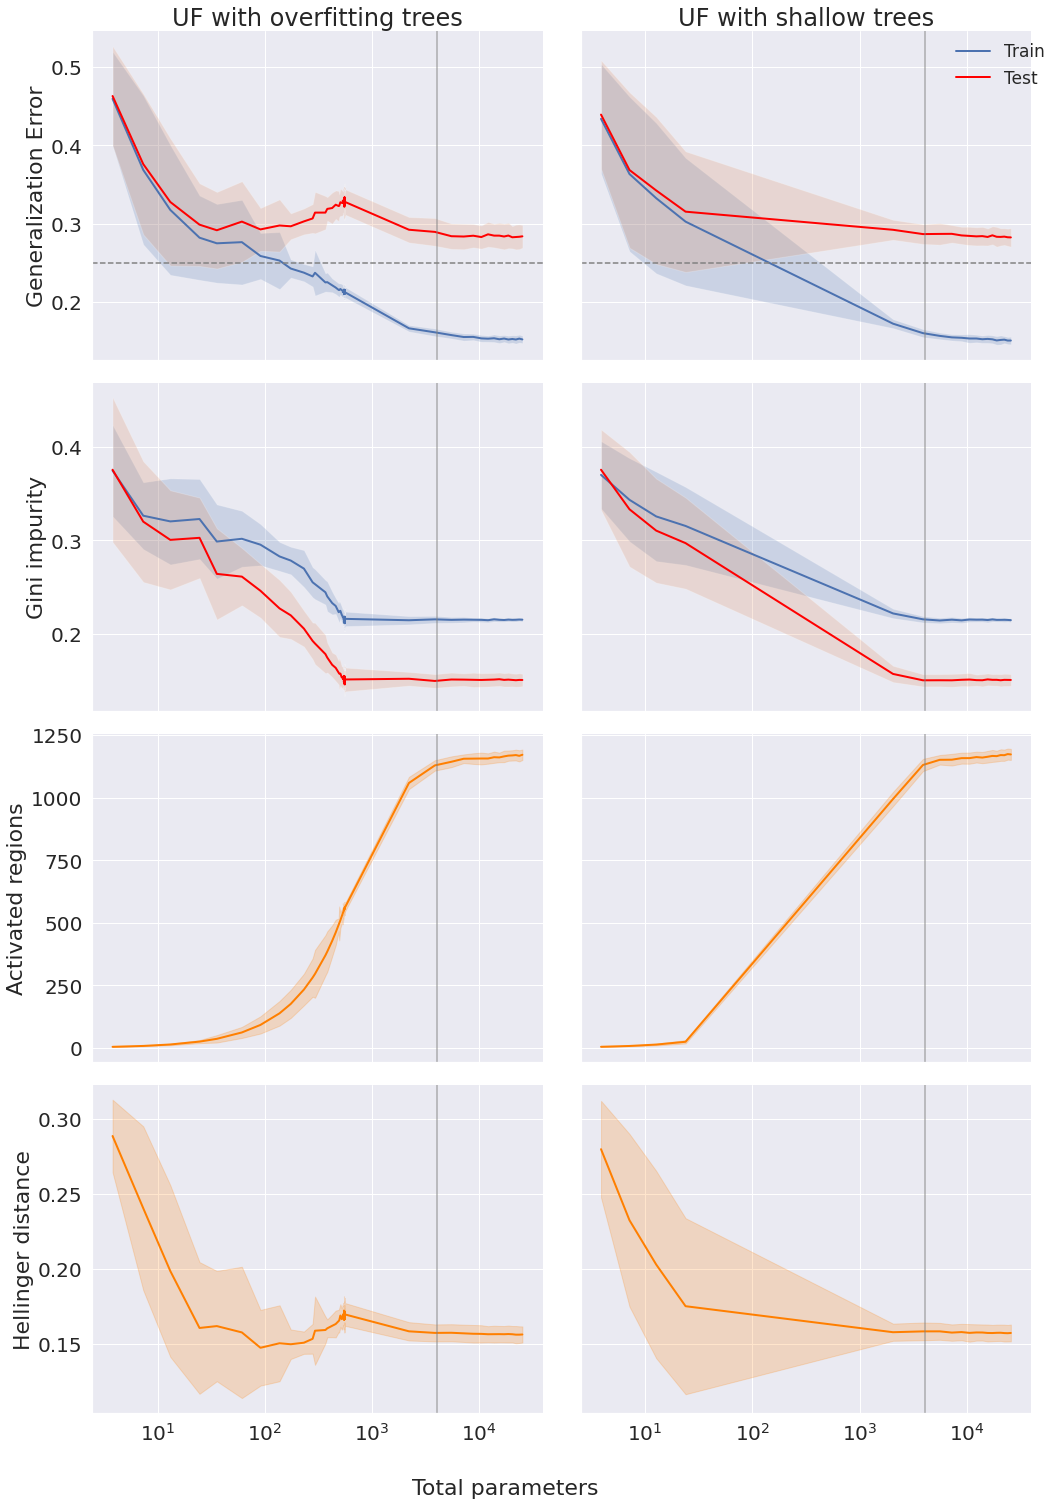

In [82]:
sns.set()
fontsize=20
ticksize=20

bayes_err = 0.25

##Figure params
fontsize = 22
ticksize = 20
linewidth = 2
fig, axes = plt.subplots(figsize=(14,20), nrows=4, ncols=2, sharex='col', sharey='row')
plt.tick_params(labelsize=ticksize)
plt.tight_layout()

titles = ['UF with overfitting trees', 'UF with shallow trees']
## Misclassification Error
for i in range(2):
    result = results[i]
#     ax = fig.add_subplot(5, 3, i+1)
    ax = axes[0,i]
    
    ax.plot(result.nodes, result.train_error.mean(0), label = 'Train', linewidth=2)
    ax.fill_between(
        result.nodes,
        (result.train_error.mean(0) - result.train_error.std(0)).clip(min=0),
        result.train_error.mean(0) + result.train_error.std(0),
        alpha=0.2)

#     ax.plot(result.nodes, result.train_transformers_error.mean(0), label = 'Train (Structure)', linewidth=2)
#     ax.fill_between(
#         result.nodes,
#         (result.train_transformers_error.mean(0) - result.train_transformers_error.std(0)).clip(min=0),
#         result.train_transformers_error.mean(0) + result.train_transformers_error.std(0),
#         alpha=0.2)

#     ax.plot(result.nodes, result.train_voters_error.mean(0), label = 'Train (Voters)', linewidth=2)
#     ax.fill_between(
#         result.nodes,
#         (result.train_voters_error.mean(0) - result.train_voters_error.std(0)).clip(min=0),
#         result.train_voters_error.mean(0) + result.train_voters_error.std(0),
#         alpha=0.2)

    ax.plot(result.nodes, result.test_error.mean(0), label = 'Test', color='red',linewidth=2)
    ax.fill_between(result.nodes, (result.test_error.mean(0) - result.test_error.std(0)).clip(min=0), result.test_error.mean(0) + result.test_error.std(0), alpha=0.2)

    ax.axvline(x=4096, color='gray', alpha=0.6)
    ax.axhline(y=bayes_err, color='gray', linestyle='--')
    if i==0:
        ax.set_ylabel('Generalization Error', fontsize = fontsize)
    ax.set_xscale("log")
#     ax = plt.gca()
    ax.locator_params(nbins=6, axis='y')
    # ax.locator_params(nbins=6, axis='x')
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    ax.set_title(titles[i], fontsize = fontsize+2)

## Gini impurity
for i in range(2):
    result = results[i]
    ax = axes[1, i]
    
    ax.plot(result.nodes, result.gini_score_train.mean(0), label = 'Train', linewidth=2)
    ax.fill_between(
        result.nodes,
        (result.gini_score_train.mean(0) - result.gini_score_train.std(0)).clip(min=0),
        result.gini_score_train.mean(0) + result.gini_score_train.std(0),
        alpha=0.2)

#     ax.plot(result.nodes, result.gini_score_train_transformers.mean(0), label = 'Train (Structure)', linewidth=2)
#     ax.fill_between(
#         result.nodes,
#         (result.gini_score_train_transformers.mean(0) - result.gini_score_train_transformers.std(0)).clip(min=0),
#         result.gini_score_train_transformers.mean(0) + result.gini_score_train_transformers.std(0),
#         alpha=0.2)
    
#     ax.plot(result.nodes, result.gini_score_train_voters.mean(0), label = 'Train (Voters)', linewidth=2)
#     ax.fill_between(
#         result.nodes,
#         (result.gini_score_train_voters.mean(0) - result.gini_score_train_voters.std(0)).clip(min=0),
#         result.gini_score_train_voters.mean(0) + result.gini_score_train_voters.std(0),
#         alpha=0.2)

    ax.plot(result.nodes, result.gini_score_test.mean(0), label = 'Test', color='red',linewidth=2)
    ax.fill_between(
        result.nodes,
        (result.gini_score_test.mean(0) - result.gini_score_test.std(0)).clip(min=0),
        result.gini_score_test.mean(0) + result.gini_score_test.std(0),
        alpha=0.2)
    ax.axvline(x=4096, color='gray', alpha=0.6)
    if i == 0:
        ax.set_ylabel('Gini impurity', fontsize = fontsize)
    ax.set_xscale("log")
    ax.locator_params(nbins=6, axis='y')
    # ax.locator_params(nbins=6, axis='x')
    ax.tick_params(axis='both', which='major', labelsize=ticksize)

lines, labels = ax.get_legend_handles_labels()    
plt.legend( lines, labels, loc = 'best', bbox_to_anchor = (0.0,-0.009,1,1),
            bbox_transform = plt.gcf().transFigure , fontsize=fontsize-5, frameon=False)


## Activation regions
for i in range(2):
    result = results[i]
    
    ax = axes[2, i]
    ax.plot(result.nodes, result.polys.mean(0), linewidth=2, c='#ff7f00')
    ax.fill_between(result.nodes, result.polys.mean(0) - result.polys.std(0), result.polys.mean(0) + result.polys.std(0), alpha=0.2, color='#ff7f00')
    ax.axvline(x=4096, color='gray', alpha=0.6)
    ax.set_xscale("log")
    if i==0:
        ax.set_ylabel('Activated regions', fontsize = fontsize)
    # plt.ylim(0,600)
    ax.locator_params(nbins=6, axis='y')
    # ax.locator_params(nbins=6, axis='x')
    ax.tick_params(axis='both', which='major', labelsize=ticksize)


## Calibration
for i in range(2):
    result = results[i]
    ax = axes[3, i]
    ax.plot(result.nodes, result.ece_error.mean(0), linewidth=2, c='#ff7f00')
    ax.fill_between(result.nodes, result.ece_error.mean(0) - result.ece_error.std(0), result.ece_error.mean(0) + result.ece_error.std(0), alpha=0.2, color='#ff7f00')
    ax.axvline(x=4096, color='gray', alpha=0.6)
    ax.set_xscale("log")
    if i==0:
        ax.set_ylabel('Hellinger distance', fontsize = fontsize)
    # plt.ylim(0,600)
    ax.locator_params(nbins=6, axis='y')
    # ax.locator_params(nbins=6, axis='x')
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
       
plt.text(0.5, 0.05, 'Total parameters', ha='center', fontsize=fontsize)
# plt.text(1.0, 0.35, 'Total activation regions', ha='center', fontsize=fontsize)

sns.despine();